In [1]:
import numpy as np
import pandas as pd
import time
inicio_ejecucion = time.time()

In [2]:
url_features_unbalanced='https://raw.githubusercontent.com/joaquinzepeda/Datos/main/datos%20supernovas/features_29_11.csv'
features_unbalanced = pd.read_csv(url_features_unbalanced, index_col=None)
features_unbalanced

,delta_mag_fid_1,positive_fraction_1,delta_mag_fid_2,positive_fraction_2,Multiband_period,PPE,Period_band_1,delta_period_1,Period_band_2,delta_period_2,...,SPM_tau_fall_1,SPM_chi_1,SPM_A_2,SPM_t0_2,SPM_gamma_2,SPM_beta_2,SPM_tau_rise_2,SPM_tau_fall_2,SPM_chi_2,classALeRCE
0,NaN,NaN,0.000000,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.640385,-4.956314,2.131374,0.465120,1.000000,40.002183,NaN,SNIa
1,0.476141,1.0,NaN,NaN,0.268756,NaN,0.268756,0.000000,NaN,NaN,...,45.143490,1.183284e-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SNIbc
2,1.349160,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,19.424429,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SNIIn
3,1.229763,1.0,NaN,NaN,0.492368,NaN,35.714285,35.221916,NaN,NaN,...,56.203844,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SNIa
4,2.293833,1.0,0.161469,1.0,55.393585,0.065590,55.393585,0.000000,NaN,NaN,...,14.573764,1.343037e-01,0.409872,-5.916583,1.890441,0.436903,2.027605,40.024896,NaN,SNIa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2001,2.879703,1.0,2.216758,1.0,104.972373,0.124809,83.333326,21.639046,142.857138,37.884766,...,23.392399,7.931159e-02,0.287074,4.316309,14.243013,0.570416,4.845103,28.891700,0.040567,SNIa
2002,2.450254,1.0,1.719614,1.0,73.359071,0.072709,2.881844,70.477226,76.923075,3.564005,...,11.076669,1.391472e-02,0.245710,12.105234,2.379414,0.340936,6.101452,14.828348,0.039756,SNIa
2003,1.627867,1.0,1.534458,1.0,1.016858,0.042308,999.999953,998.983094,999.999953,998.983094,...,19.974884,4.521348e-02,0.401462,5.696664,35.855792,0.521981,3.882842,30.064385,0.056440,SNIa
2004,1.344170,1.0,2.227105,1.0,1.024148,0.016782,999.999953,998.975804,999.999953,998.975804,...,4.324015,1.353607e+00,0.145629,4.926030,8.235378,0.014030,2.534057,19.834071,0.047055,SNIa


In [3]:
banned_features=[]
for column in features_unbalanced.columns:
    if features_unbalanced[column].isna().sum()>200:
        print(column,features_unbalanced[column].isna().sum())
        banned_features.append(column)

Period_band_1 380
delta_period_1 380
Period_band_2 291
delta_period_2 291
MHPS_ratio_1 217
MHPS_low_1 217
MHPS_high_1 217
MHPS_ratio_2 214
MHPS_low_2 214
MHPS_high_2 214
Amplitude_1 380
AndersonDarling_1 380
Autocor_length_1 380
Beyond1Std_1 380
Con_1 380
Gskew_1 383
Meanvariance_1 380
MedianAbsDev_1 380
MedianBRP_1 380
PairSlopeTrend_1 380
PercentAmplitude_1 380
Q31_1 380
Rcs_1 380
Skew_1 380
SmallKurtosis_1 380
Std_1 380
StetsonK_1 380
Pvar_1 380
ExcessVar_1 380
SF_ML_amplitude_1 380
SF_ML_gamma_1 380
IAR_phi_1 380
LinearTrend_1 380
Amplitude_2 291
AndersonDarling_2 291
Autocor_length_2 291
Beyond1Std_2 291
Con_2 291
Gskew_2 294
Meanvariance_2 291
MedianAbsDev_2 291
MedianBRP_2 291
PairSlopeTrend_2 291
PercentAmplitude_2 291
Q31_2 291
Rcs_2 291
Skew_2 291
SmallKurtosis_2 291
Std_2 291
StetsonK_2 291
Pvar_2 291
ExcessVar_2 291
SF_ML_amplitude_2 291
SF_ML_gamma_2 291
IAR_phi_2 291
LinearTrend_2 291
SPM_chi_1 434
SPM_chi_2 368


In [4]:
SNIbc = features_unbalanced.loc[:, 'classALeRCE'] == 'SNIbc'
f_SNIbc = features_unbalanced.loc[SNIbc]
for column in f_SNIbc.columns:
    if f_SNIbc[column].isna().sum()>20:
        print(column,f_SNIbc[column].isna().sum())
        if not column in banned_features:
            banned_features.append(column)

Period_band_1 25
delta_period_1 25
Amplitude_1 25
AndersonDarling_1 25
Autocor_length_1 25
Beyond1Std_1 25
Con_1 25
Gskew_1 25
Meanvariance_1 25
MedianAbsDev_1 25
MedianBRP_1 25
PairSlopeTrend_1 25
PercentAmplitude_1 25
Q31_1 25
Rcs_1 25
Skew_1 25
SmallKurtosis_1 25
Std_1 25
StetsonK_1 25
Pvar_1 25
ExcessVar_1 25
SF_ML_amplitude_1 25
SF_ML_gamma_1 25
IAR_phi_1 25
LinearTrend_1 25
SPM_chi_1 28
SPM_chi_2 21


In [5]:
banned_features.append('positive_fraction_1')
banned_features.append('positive_fraction_2')

features_unbalanced_2 = features_unbalanced.drop(banned_features, axis=1)
features_unbalanced_2

,delta_mag_fid_1,delta_mag_fid_2,Multiband_period,PPE,GP_DRW_sigma_1,GP_DRW_tau_1,GP_DRW_sigma_2,GP_DRW_tau_2,Psi_CS_1,Psi_eta_1,...,SPM_beta_1,SPM_tau_rise_1,SPM_tau_fall_1,SPM_A_2,SPM_t0_2,SPM_gamma_2,SPM_beta_2,SPM_tau_rise_2,SPM_tau_fall_2,classALeRCE
0,NaN,0.000000,NaN,NaN,NaN,NaN,3.207979e-07,1.000000,NaN,NaN,...,NaN,NaN,NaN,0.640385,-4.956314,2.131374,0.465120,1.000000,40.002183,SNIa
1,0.476141,NaN,0.268756,NaN,4.366276e-07,0.645993,NaN,NaN,0.386155,0.472763,...,0.685209,7.929962,45.143490,NaN,NaN,NaN,NaN,NaN,NaN,SNIbc
2,1.349160,NaN,NaN,NaN,4.411922e-01,1.000000,NaN,NaN,0.250000,4.000000,...,0.213151,3.518764,19.424429,NaN,NaN,NaN,NaN,NaN,NaN,SNIIn
3,1.229763,NaN,0.492368,NaN,2.600133e-01,0.682878,NaN,NaN,0.455058,1.202776,...,0.787373,6.550574,56.203844,NaN,NaN,NaN,NaN,NaN,NaN,SNIa
4,2.293833,0.161469,55.393585,0.065590,8.946432e-01,38.460422,1.972707e-07,0.014833,0.392285,0.143114,...,0.789877,3.200502,14.573764,0.409872,-5.916583,1.890441,0.436903,2.027605,40.024896,SNIa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2001,2.879703,2.216758,104.972373,0.124809,1.260287e+00,147.264047,6.365977e-01,176.766310,0.434621,0.022179,...,0.811519,3.194500,23.392399,0.287074,4.316309,14.243013,0.570416,4.845103,28.891700,SNIa
2002,2.450254,1.719614,73.359071,0.072709,1.162841e+00,71.233951,3.446747e-01,58.279197,0.474268,0.067525,...,0.693153,5.834285,11.076669,0.245710,12.105234,2.379414,0.340936,6.101452,14.828348,SNIa
2003,1.627867,1.534458,1.016858,0.042308,6.753090e-01,64.130345,5.533646e-01,89.832297,0.269540,0.755514,...,0.269451,3.415255,19.974884,0.401462,5.696664,35.855792,0.521981,3.882842,30.064385,SNIa
2004,1.344170,2.227105,1.024148,0.016782,2.381991e-01,11.921702,5.773781e-01,21.715308,0.243585,0.561890,...,0.003264,21.405151,4.324015,0.145629,4.926030,8.235378,0.014030,2.534057,19.834071,SNIa


In [6]:
thresh = features_unbalanced_2.shape[1]
thresh

59

In [7]:
features_clean_unbalanced = features_unbalanced_2.dropna(thresh=thresh)
features_clean_unbalanced

,delta_mag_fid_1,delta_mag_fid_2,Multiband_period,PPE,GP_DRW_sigma_1,GP_DRW_tau_1,GP_DRW_sigma_2,GP_DRW_tau_2,Psi_CS_1,Psi_eta_1,...,SPM_beta_1,SPM_tau_rise_1,SPM_tau_fall_1,SPM_A_2,SPM_t0_2,SPM_gamma_2,SPM_beta_2,SPM_tau_rise_2,SPM_tau_fall_2,classALeRCE
4,2.293833,0.161469,55.393585,0.065590,0.894643,38.460422,1.972707e-07,0.014833,0.392285,0.143114,...,0.789877,3.200502,14.573764,0.409872,-5.916583,1.890441,0.436903,2.027605,40.024896,SNIa
5,2.408327,1.783373,81.545061,0.055254,0.707645,64.112098,4.387686e-01,19.155729,0.430308,0.324029,...,0.849716,2.608640,22.475434,2.351915,13.064873,33.601755,0.733364,7.567848,24.144588,SNIa
6,1.630600,1.685797,70.631969,0.052348,0.306272,18.630268,3.852972e-01,29.287269,0.460465,0.107701,...,0.087751,3.882578,14.437207,0.204335,6.718844,22.289199,0.509023,3.733501,28.908232,SNIa
9,1.595300,1.213383,1.000737,0.027420,0.294080,210.411244,1.771446e-01,254.976949,0.314567,0.628369,...,0.001872,73.942125,99.999454,0.099472,49.079889,100.000000,0.026584,99.340819,99.959041,SLSN
13,1.224470,0.563530,0.880608,0.000289,0.171732,1.609111,3.714722e-02,0.365953,0.474583,0.681042,...,0.473815,5.426547,79.514597,0.235642,-4.019513,1.010255,0.383227,5.405705,74.814037,SNIa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2001,2.879703,2.216758,104.972373,0.124809,1.260287,147.264047,6.365977e-01,176.766310,0.434621,0.022179,...,0.811519,3.194500,23.392399,0.287074,4.316309,14.243013,0.570416,4.845103,28.891700,SNIa
2002,2.450254,1.719614,73.359071,0.072709,1.162841,71.233951,3.446747e-01,58.279197,0.474268,0.067525,...,0.693153,5.834285,11.076669,0.245710,12.105234,2.379414,0.340936,6.101452,14.828348,SNIa
2003,1.627867,1.534458,1.016858,0.042308,0.675309,64.130345,5.533646e-01,89.832297,0.269540,0.755514,...,0.269451,3.415255,19.974884,0.401462,5.696664,35.855792,0.521981,3.882842,30.064385,SNIa
2004,1.344170,2.227105,1.024148,0.016782,0.238199,11.921702,5.773781e-01,21.715308,0.243585,0.561890,...,0.003264,21.405151,4.324015,0.145629,4.926030,8.235378,0.014030,2.534057,19.834071,SNIa


In [8]:
count_clase1 = pd.DataFrame({'classALeRCE':features_clean_unbalanced['classALeRCE']})
count_clase1.groupby(count_clase1.columns.tolist(),as_index=False).size()

,classALeRCE,size
0,SLSN,33
1,SNII,282
2,SNIIb,14
3,SNIIn,33
4,SNIa,1286
5,SNIbc,77


In [9]:
features_clean_unbalanced['classALeRCE']= features_clean_unbalanced['classALeRCE'].replace(['SNIIb','SNIIn'],'SNII')
try:
    features_clean_unbalanced = features_clean_unbalanced.set_index('oid')
except:
    pass
features_clean_unbalanced

C:\Users\joaqu\.conda\envs\EL4106-gpu\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,delta_mag_fid_1,delta_mag_fid_2,Multiband_period,PPE,GP_DRW_sigma_1,GP_DRW_tau_1,GP_DRW_sigma_2,GP_DRW_tau_2,Psi_CS_1,Psi_eta_1,...,SPM_beta_1,SPM_tau_rise_1,SPM_tau_fall_1,SPM_A_2,SPM_t0_2,SPM_gamma_2,SPM_beta_2,SPM_tau_rise_2,SPM_tau_fall_2,classALeRCE
4,2.293833,0.161469,55.393585,0.065590,0.894643,38.460422,1.972707e-07,0.014833,0.392285,0.143114,...,0.789877,3.200502,14.573764,0.409872,-5.916583,1.890441,0.436903,2.027605,40.024896,SNIa
5,2.408327,1.783373,81.545061,0.055254,0.707645,64.112098,4.387686e-01,19.155729,0.430308,0.324029,...,0.849716,2.608640,22.475434,2.351915,13.064873,33.601755,0.733364,7.567848,24.144588,SNIa
6,1.630600,1.685797,70.631969,0.052348,0.306272,18.630268,3.852972e-01,29.287269,0.460465,0.107701,...,0.087751,3.882578,14.437207,0.204335,6.718844,22.289199,0.509023,3.733501,28.908232,SNIa
9,1.595300,1.213383,1.000737,0.027420,0.294080,210.411244,1.771446e-01,254.976949,0.314567,0.628369,...,0.001872,73.942125,99.999454,0.099472,49.079889,100.000000,0.026584,99.340819,99.959041,SLSN
13,1.224470,0.563530,0.880608,0.000289,0.171732,1.609111,3.714722e-02,0.365953,0.474583,0.681042,...,0.473815,5.426547,79.514597,0.235642,-4.019513,1.010255,0.383227,5.405705,74.814037,SNIa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2001,2.879703,2.216758,104.972373,0.124809,1.260287,147.264047,6.365977e-01,176.766310,0.434621,0.022179,...,0.811519,3.194500,23.392399,0.287074,4.316309,14.243013,0.570416,4.845103,28.891700,SNIa
2002,2.450254,1.719614,73.359071,0.072709,1.162841,71.233951,3.446747e-01,58.279197,0.474268,0.067525,...,0.693153,5.834285,11.076669,0.245710,12.105234,2.379414,0.340936,6.101452,14.828348,SNIa
2003,1.627867,1.534458,1.016858,0.042308,0.675309,64.130345,5.533646e-01,89.832297,0.269540,0.755514,...,0.269451,3.415255,19.974884,0.401462,5.696664,35.855792,0.521981,3.882842,30.064385,SNIa
2004,1.344170,2.227105,1.024148,0.016782,0.238199,11.921702,5.773781e-01,21.715308,0.243585,0.561890,...,0.003264,21.405151,4.324015,0.145629,4.926030,8.235378,0.014030,2.534057,19.834071,SNIa


In [10]:
SNIbc = features_clean_unbalanced.loc[:, 'classALeRCE'] == 'SNIbc'
f_SNIbc = features_clean_unbalanced.loc[SNIbc]

In [11]:
from scipy import stats
z_scores = stats.zscore(features_clean_unbalanced.iloc[:,:-1])
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
features_clean_unbalanced_2 = features_clean_unbalanced[filtered_entries]
features_clean_unbalanced_2

,delta_mag_fid_1,delta_mag_fid_2,Multiband_period,PPE,GP_DRW_sigma_1,GP_DRW_tau_1,GP_DRW_sigma_2,GP_DRW_tau_2,Psi_CS_1,Psi_eta_1,...,SPM_beta_1,SPM_tau_rise_1,SPM_tau_fall_1,SPM_A_2,SPM_t0_2,SPM_gamma_2,SPM_beta_2,SPM_tau_rise_2,SPM_tau_fall_2,classALeRCE
4,2.293833,0.161469,55.393585,0.065590,0.894643,38.460422,1.972707e-07,0.014833,0.392285,0.143114,...,0.789877,3.200502,14.573764,0.409872,-5.916583,1.890441,0.436903,2.027605,40.024896,SNIa
6,1.630600,1.685797,70.631969,0.052348,0.306272,18.630268,3.852972e-01,29.287269,0.460465,0.107701,...,0.087751,3.882578,14.437207,0.204335,6.718844,22.289199,0.509023,3.733501,28.908232,SNIa
13,1.224470,0.563530,0.880608,0.000289,0.171732,1.609111,3.714722e-02,0.365953,0.474583,0.681042,...,0.473815,5.426547,79.514597,0.235642,-4.019513,1.010255,0.383227,5.405705,74.814037,SNIa
19,2.163100,0.994800,1.475270,0.018361,0.655782,42.229331,1.058014e-01,4.388563,0.405269,0.449329,...,0.702593,3.050974,14.946512,0.156091,1.997889,23.617408,0.449350,2.561875,45.195558,SNIa
22,1.901634,2.023676,109.195398,0.053022,0.535352,20.919933,3.939967e-01,70.306685,0.426668,0.426321,...,0.772095,3.567718,24.452127,1.379499,1.232484,27.710283,0.702184,3.881646,47.166962,SNIbc
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1999,1.453450,1.948065,2.915899,0.094520,0.249426,5.200743,6.972598e-01,96.724854,0.357870,1.319926,...,0.619430,6.797204,11.449546,0.186096,-18.838724,45.589960,0.815018,3.864740,29.497786,SNIa
2000,3.315960,2.804861,121.019098,0.092441,1.197242,71.002329,1.362243e+00,437.483144,0.430766,0.066430,...,0.806174,3.010085,18.583295,1.155343,13.314808,5.771280,0.526529,8.480849,22.142866,SNIa
2001,2.879703,2.216758,104.972373,0.124809,1.260287,147.264047,6.365977e-01,176.766310,0.434621,0.022179,...,0.811519,3.194500,23.392399,0.287074,4.316309,14.243013,0.570416,4.845103,28.891700,SNIa
2002,2.450254,1.719614,73.359071,0.072709,1.162841,71.233951,3.446747e-01,58.279197,0.474268,0.067525,...,0.693153,5.834285,11.076669,0.245710,12.105234,2.379414,0.340936,6.101452,14.828348,SNIa


In [12]:
#features_clean_unbalanced_2=features_clean_unbalanced

In [13]:
count_clase2 = pd.DataFrame({'classALeRCE':features_clean_unbalanced_2['classALeRCE']})
count_clase2 = count_clase2.groupby(count_clase2.columns.tolist(),as_index=False).size()
count_clase2

,classALeRCE,size
0,SLSN,12
1,SNII,179
2,SNIa,1056
3,SNIbc,60


In [23]:
from sklearn.model_selection import train_test_split

X, y = features_clean_unbalanced_2.iloc[:,:-1], features_clean_unbalanced_2['classALeRCE']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

In [24]:
from sklearn.ensemble import RandomForestClassifier
classifier_0 = RandomForestClassifier(
    n_estimators=50,
    criterion='gini',
    max_depth=30,
    max_features='sqrt',
    n_jobs=-1,
    class_weight='balanced'
)
classifier_0.fit(X_train,y_train)

#------------------SE PRUEBA EL CLASIFICADOR----------------------------------
# predict new data:
#pues solo usaremos el target para comprobar la eficacia de la predicción

pred_labels_0 = classifier_0.predict(X_test)

#------------------Metricas de desempeño----------------------------------

from sklearn import metrics
accuracy_0= metrics.balanced_accuracy_score(y_test, pred_labels_0)*100
presicion_0 = metrics.precision_score(y_test, pred_labels_0,average='macro')*100
recall_0 = metrics.recall_score(y_test, pred_labels_0,average='macro')*100
print("Classification accuracy is %2f"%accuracy_0,"%")
print("Classification precision is %2f"%presicion_0,"%")
print("Classification recall is %2f"%recall_0,"%")

Classification accuracy is 33.333333 %
Classification precision is 43.349146 %
Classification recall is 33.333333 %


C:\Users\joaqu\.conda\envs\EL4106-gpu\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Text(0, 0.5, 'Muestras')

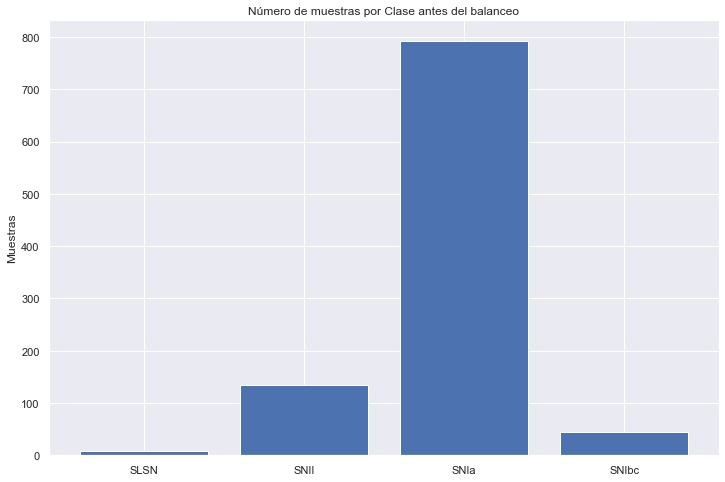

In [25]:
count_clase3 = pd.DataFrame({'y_train':y_train})
count_clase3 = count_clase3.groupby(count_clase3.columns.tolist(),as_index=False).size()
count_clase3 
import matplotlib.pyplot as plt
plt.bar(count_clase3['y_train'],count_clase3['size'].values)
plt.title('Número de muestras por Clase antes del balanceo')
plt.ylabel('Muestras')

Text(0, 0.5, 'Muestras')

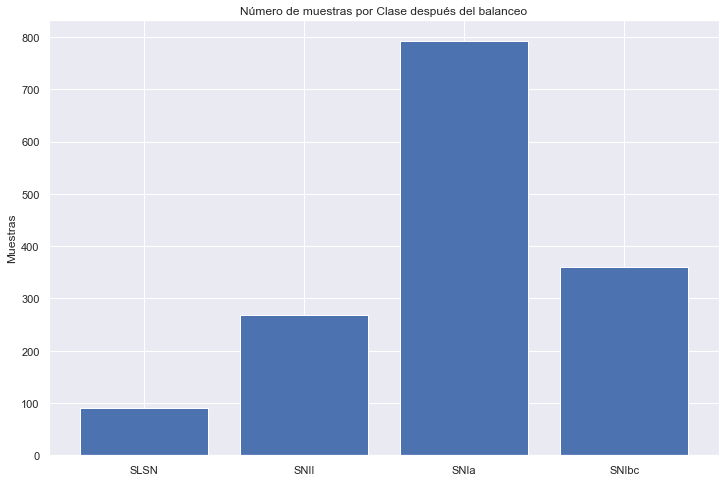

In [26]:
from imblearn.over_sampling import SMOTE

# transform the dataset
# clase 0 : SLSN, clase 1: SNII, clase 2: SNIa,clase 3 = SNIbc
oversample = SMOTE(sampling_strategy = {'SLSN': count_clase3['size'][0]*10, 'SNII': count_clase3['size'][1]*2, 'SNIa': count_clase3['size'][2]*1, 'SNIbc': count_clase3['size'][3]*8})
X_train_smote, y_train_smote = oversample.fit_resample(X_train, y_train)

count_clase5 = pd.DataFrame({'y_train_smote':y_train_smote})
count_clase5 = count_clase5.groupby(count_clase5.columns.tolist(),as_index=False).size()
count_clase5 
import matplotlib.pyplot as plt
plt.bar(count_clase5['y_train_smote'],count_clase5['size'].values)
plt.title('Número de muestras por Clase después del balanceo')
plt.ylabel('Muestras')

Classification accuracy is 38.604798 %
Classification precision is 41.877140 %
Classification recall is 38.604798 %


Text(84.5, 0.5, 'True Label')

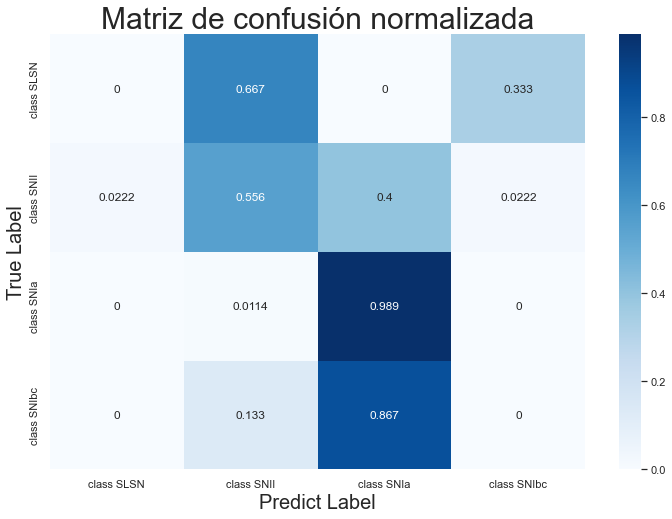

In [29]:
classifier = RandomForestClassifier(
    n_estimators=100,
    max_depth=100,
    max_features= 'auto',
    min_samples_leaf=4,
    min_samples_split= 2,
    bootstrap=False,
    class_weight='balanced'
)
#-----------------------ENTRENAMIENTO-----------------------------------------
classifier.fit(X_train_smote,y_train_smote)

#------------------SE PRUEBA EL CLASIFICADOR----------------------------------
# predict new data:
#pues solo usaremos el target para comprobar la eficacia de la predicción

pred_labels = classifier.predict(X_test)

# calculate accuracy
from sklearn import metrics
accuracy= metrics.balanced_accuracy_score(y_test, pred_labels)*100
presicion= metrics.precision_score(y_test, pred_labels,average='macro')*100
recall = metrics.recall_score(y_test, pred_labels,average='macro')*100
print("Classification accuracy is %2f"%accuracy,"%")
print("Classification precision is %2f"%presicion,"%")
print("Classification recall is %2f"%recall,"%")

# Confusion Matrix
from sklearn.metrics import confusion_matrix
import seaborn as sn

columns = ['class %s' %(i) for i in count_clase5['y_train_smote']]

confm = confusion_matrix(y_test, pred_labels,normalize='true')
df_cm = pd.DataFrame(confm, index=columns, columns=columns)
ax = sn.heatmap(df_cm, cmap='Blues',fmt='.3g', annot=True)
sn.set(rc={'figure.figsize':(12,8)})
ax.set_title('Matriz de confusión normalizada',fontsize=30)
ax.set_xlabel('Predict Label',fontsize=20)
ax.set_ylabel('True Label',fontsize=20)

In [22]:
features_clean_unbalanced[features_clean_unbalanced['classALeRCE']=='SNIa' ]

,delta_mag_fid_1,delta_mag_fid_2,Multiband_period,PPE,GP_DRW_sigma_1,GP_DRW_tau_1,GP_DRW_sigma_2,GP_DRW_tau_2,Psi_CS_1,Psi_eta_1,...,SPM_beta_1,SPM_tau_rise_1,SPM_tau_fall_1,SPM_A_2,SPM_t0_2,SPM_gamma_2,SPM_beta_2,SPM_tau_rise_2,SPM_tau_fall_2,classALeRCE
4,2.293833,0.161469,55.393585,0.065590,0.894643,38.460422,1.972707e-07,0.014833,0.392285,0.143114,...,0.789877,3.200502,14.573764,0.409872,-5.916583,1.890441,0.436903,2.027605,40.024896,SNIa
5,2.408327,1.783373,81.545061,0.055254,0.707645,64.112098,4.387686e-01,19.155729,0.430308,0.324029,...,0.849716,2.608640,22.475434,2.351915,13.064873,33.601755,0.733364,7.567848,24.144588,SNIa
6,1.630600,1.685797,70.631969,0.052348,0.306272,18.630268,3.852972e-01,29.287269,0.460465,0.107701,...,0.087751,3.882578,14.437207,0.204335,6.718844,22.289199,0.509023,3.733501,28.908232,SNIa
13,1.224470,0.563530,0.880608,0.000289,0.171732,1.609111,3.714722e-02,0.365953,0.474583,0.681042,...,0.473815,5.426547,79.514597,0.235642,-4.019513,1.010255,0.383227,5.405705,74.814037,SNIa
16,4.077647,2.027711,404.255311,0.043757,2.515581,861.589996,6.129965e-01,22.194022,0.451384,0.026680,...,0.750160,41.142269,49.527282,2.057030,-0.348371,67.350987,0.564823,28.476172,26.005811,SNIa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2001,2.879703,2.216758,104.972373,0.124809,1.260287,147.264047,6.365977e-01,176.766310,0.434621,0.022179,...,0.811519,3.194500,23.392399,0.287074,4.316309,14.243013,0.570416,4.845103,28.891700,SNIa
2002,2.450254,1.719614,73.359071,0.072709,1.162841,71.233951,3.446747e-01,58.279197,0.474268,0.067525,...,0.693153,5.834285,11.076669,0.245710,12.105234,2.379414,0.340936,6.101452,14.828348,SNIa
2003,1.627867,1.534458,1.016858,0.042308,0.675309,64.130345,5.533646e-01,89.832297,0.269540,0.755514,...,0.269451,3.415255,19.974884,0.401462,5.696664,35.855792,0.521981,3.882842,30.064385,SNIa
2004,1.344170,2.227105,1.024148,0.016782,0.238199,11.921702,5.773781e-01,21.715308,0.243585,0.561890,...,0.003264,21.405151,4.324015,0.145629,4.926030,8.235378,0.014030,2.534057,19.834071,SNIa
